In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# wczytywanie danych
#w folderze z zadaniem znajduje sie plik 'statystyki.xslx', w ktorym znajduja sie dane
xls = pd.ExcelFile('statystyki.xlsx')
data = pd.read_excel(xls, 'PM2,5')

# filtrowanie danych zgodnie z poleceniem
data['Rok'] = pd.to_numeric(data['Rok'], errors='coerce')
data_filtered = data[(data['Rok'] >= 2010) & (data['Rok'] <= 2023) & (data['Czas uśredniania'] == '24g')]


# wybor dwoch stacji pomiarowych tak, aby zakres pokrywal lata 2010-2023
stations = data_filtered.groupby('Kod stacji')['Rok'].nunique()
stations_full_period = stations[stations == 14].index
station_1 = stations_full_period[0]
station_2 = stations_full_period[1]
station_1_data = data_filtered[data_filtered['Kod stacji'] == station_1]
station_2_data = data_filtered[data_filtered['Kod stacji'] == station_2]


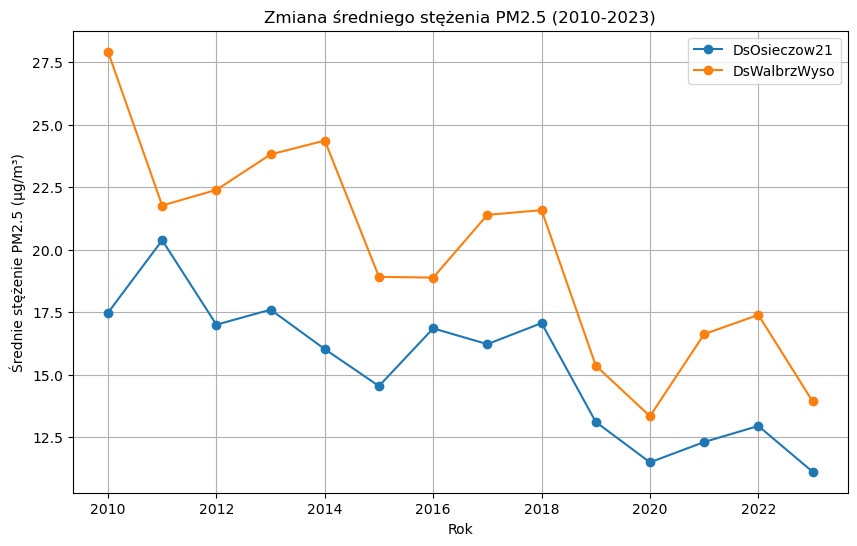

In [40]:
# wykres liniowy dla dwóch stacji
plt.figure(figsize=(10, 6))
plt.plot(station_1_data['Rok'], station_1_data['Średnia'], label=station_1, marker='o')
plt.plot(station_2_data['Rok'], station_2_data['Średnia'], label=station_2, marker='o')
plt.title('Zmiana średniego stężenia PM2.5 (2010-2023)')
plt.xlabel('Rok')
plt.ylabel('Średnie stężenie PM2.5 (µg/m³)')
plt.legend()
plt.grid()
plt.show()

Na wykresie obserwujecemy spadkową tendencję średniego stężenia PM2.5 w latach 2010-2023. Zauważmy, że dla wałbrzyskiej stacji, stężenie zmalało aż dwukrtonie w 13 lat, niemniej jednak w każdym roku zanieczyszczenie na stacji w Osieczowie było mniejsze.

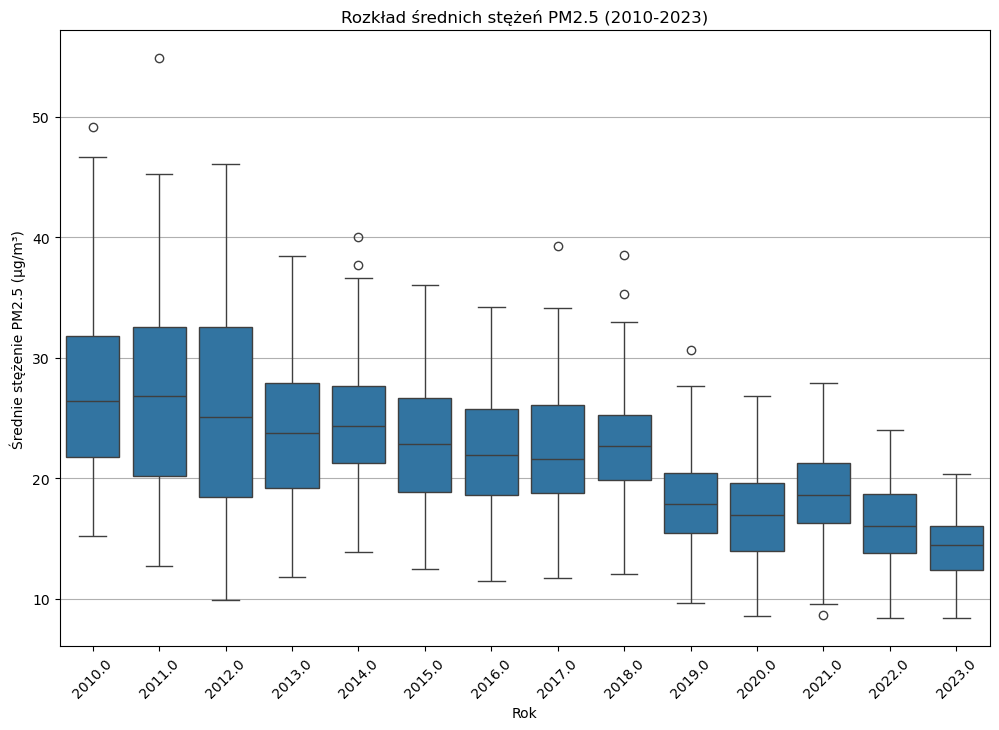

In [41]:
# wykres pudełkowy z podziałem na lata
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_filtered, x='Rok', y='Średnia')
plt.title('Rozkład średnich stężeń PM2.5 (2010-2023)')
plt.xlabel('Rok')
plt.ylabel('Średnie stężenie PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Ponownie, obserwujemy spadek stężenia PM 2,5 na przestrzeni lat. Co więcej widać, że rozrzut stężenia również z reguły malał; porównajmy dla przykładu rok 2012 i 2023.

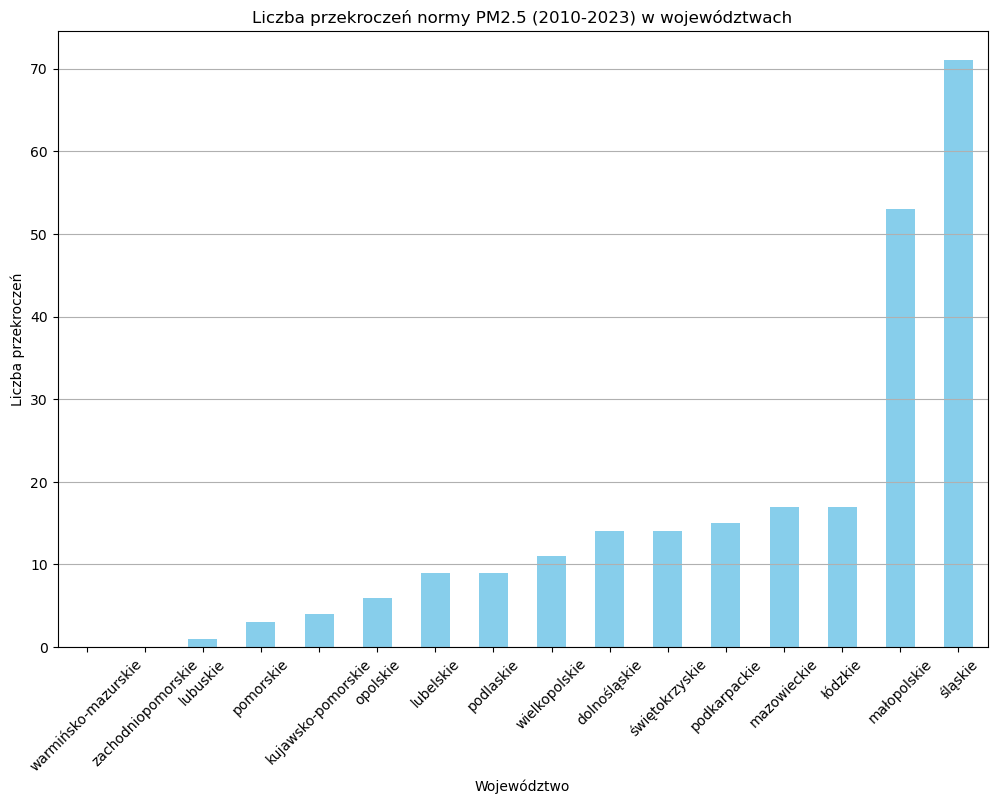

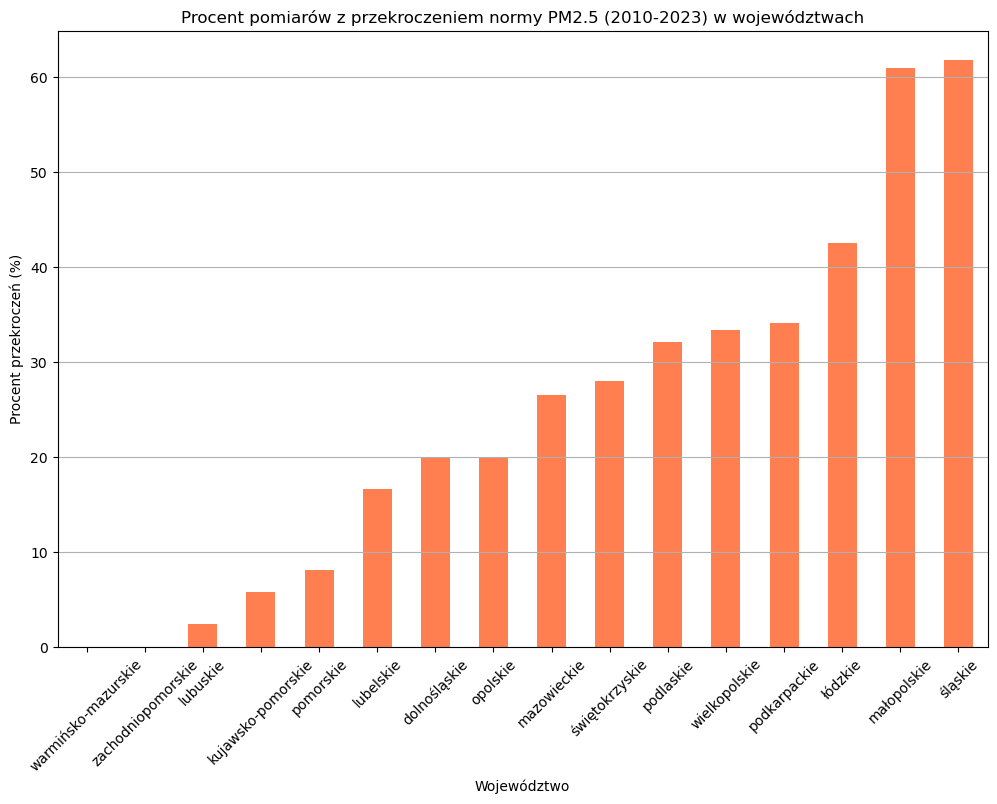

In [38]:
# funkcja oblicza liczbe przekroczeń normy dla województw
def calculate_exceedances(group):
    exceedances = group[group['Średnia'] > 25].shape[0]
    total_measurements = group.shape[0]
    return pd.Series({'Exceedances': exceedances, 'Total': total_measurements})

exceedances = data_filtered.groupby(['Województwo']).apply(calculate_exceedances)
exceedances['Percentage'] = (exceedances['Exceedances'] / exceedances['Total']) * 100

# wykres słupkowy - liczba przekroczeń
plt.figure(figsize=(12, 8))
exceedances['Exceedances'].sort_values().plot(kind='bar', color='skyblue')
plt.title('Liczba przekroczeń normy PM2.5 (2010-2023) w województwach')
plt.xlabel('Województwo')
plt.ylabel('Liczba przekroczeń')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# wykres słupkowy - procent przekroczeń
plt.figure(figsize=(12, 8))
exceedances['Percentage'].sort_values().plot(kind='bar', color='coral')
plt.title('Procent pomiarów z przekroczeniem normy PM2.5 (2010-2023) w województwach')
plt.xlabel('Województwo')
plt.ylabel('Procent przekroczeń (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Najwięcej razy normę przekroczono w województwie śląskim, co nie powinno dziwić. Rejon jest polską stolicą przemysłu. Najlepiej w zestawieniu wypada województwo warmińsko-mazurskie, w którym nie zarejestrowano żadnych przekroczeń.